<a href="https://colab.research.google.com/github/stuthikathula/pharmacy-stock1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# read an excel file and convert
df = pd.DataFrame(pd.read_excel("dataset.xlsx"))

# show the dataframe
df


,MEDICINE-NAME,CURRENT STOCK,DEMAND,LEAD TIME
0,Abacavir,46,23,1
1,Abilify,48,44,2
2,Accutane,55,24,6
3,Acetaminophen,40,46,3
4,Acetylcysteine,45,21,10
...,...,...,...,...
666,Zolpidem,38,19,3
667,Zonisamide,49,36,1
668,Zoledronic Acid,33,23,10
669,Zotepine,36,36,10


# New Section

In [2]:
df.head()

,MEDICINE-NAME,CURRENT STOCK,DEMAND,LEAD TIME
0,Abacavir,46,23,1
1,Abilify,48,44,2
2,Accutane,55,24,6
3,Acetaminophen,40,46,3
4,Acetylcysteine,45,21,10


In [3]:
df.tail()

,MEDICINE-NAME,CURRENT STOCK,DEMAND,LEAD TIME
666,Zolpidem,38,19,3
667,Zonisamide,49,36,1
668,Zoledronic Acid,33,23,10
669,Zotepine,36,36,10
670,Zuclopenthixol,50,35,2


In [4]:
df.shape

(671, 4)

In [5]:
df.columns

Index(['MEDICINE-NAME', 'CURRENT STOCK', 'DEMAND', 'LEAD TIME'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MEDICINE-NAME  671 non-null    object
 1   CURRENT STOCK  671 non-null    int64 
 2   DEMAND         671 non-null    int64 
 3   LEAD TIME      671 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 21.1+ KB


In [7]:
df.describe()

,CURRENT STOCK,DEMAND,LEAD TIME
count,671.000000,671.000000,671.000000
mean,40.014903,29.810730,5.436662
std,11.604287,11.989608,2.751135
min,20.000000,10.000000,1.000000
25%,30.000000,19.500000,3.000000
50%,40.000000,29.000000,6.000000
75%,50.000000,40.000000,8.000000
max,60.000000,50.000000,10.000000


In [8]:
df.isnull().sum()

MEDICINE-NAME    0
CURRENT STOCK    0
DEMAND           0
LEAD TIME        0
dtype: int64

In [9]:
current_stock = df['CURRENT STOCK']
demand_stock = df['DEMAND']
medicine_names = df['MEDICINE-NAME']
lead_time = df['LEAD TIME']

In [10]:
df['Prediction'] = current_stock-demand_stock*lead_time

# Label whether it's understock or overstock
df['Stock Status'] = df['Prediction'].apply(lambda x: 'Understock' if x < 0 else 'Overstock')

print(df)


       MEDICINE-NAME  CURRENT STOCK  DEMAND  LEAD TIME  Prediction  \
0           Abacavir             46      23          1          23   
1            Abilify             48      44          2         -40   
2           Accutane             55      24          6         -89   
3      Acetaminophen             40      46          3         -98   
4     Acetylcysteine             45      21         10        -165   
..               ...            ...     ...        ...         ...   
666         Zolpidem             38      19          3         -19   
667       Zonisamide             49      36          1          13   
668  Zoledronic Acid             33      23         10        -197   
669         Zotepine             36      36         10        -324   
670   Zuclopenthixol             50      35          2         -20   

    Stock Status  
0      Overstock  
1     Understock  
2     Understock  
3     Understock  
4     Understock  
..           ...  
666   Understock  
667    

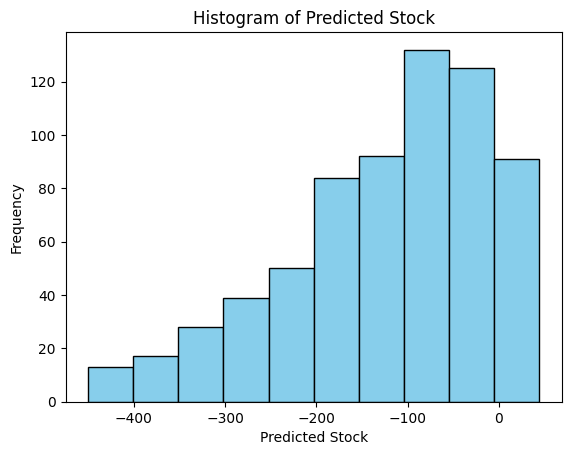

In [11]:
import matplotlib.pyplot as plt

# Histogram
plt.hist(df['Prediction'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Predicted Stock')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Stock')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
# Define features (X) and target variable (y)
X = df[['CURRENT STOCK','DEMAND','LEAD TIME']].values
y = np.where(df['Prediction'] < 0, 0, 1)  # Assign 0 for understock and 1 for overstock
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.svm import SVC
# Initialize Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       115
           1       1.00      0.85      0.92        20

    accuracy                           0.98       135
   macro avg       0.99      0.93      0.95       135
weighted avg       0.98      0.98      0.98       135


Confusion Matrix:
[[115   0]
 [  3  17]]
